<a href="https://colab.research.google.com/github/muralianamala/pythonlearning/blob/main/Netflix_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETXLIX INSIGHTS**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **READ DATA**

In [ ]:
nf = pd.read_csv('netflix.csv')
nf.head()
temp = nf

In [ ]:
nf.describe(include=object).T
# as per describe function, its giving each and every field details

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


## Data insights

- ~30% of null data of Director in the DataFrame
- ~10% of null data of cast and country in the DataFrame

In [ ]:
nf.isna().sum()/len(nf)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

## **Type field insights**

What percent of Data relates to Movies and TVShows
- ~70% of data relates to Movie's
- 30% of data relates to TV Show's

In [ ]:
nf['type'].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

<Axes: ylabel='type'>

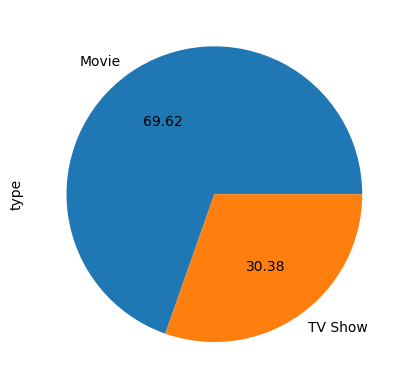

In [ ]:
nf['type'].value_counts().plot(kind='pie', autopct='%.2f')

## **DROP 'description' field**

In [ ]:
nf.drop(columns='description', inplace=True)

- Director cloumn having 2634 null values
- cast column having 825 null values
- country columns having 831 null values
- date_added column having 10 null values
- rating column having 4 null values
- duration column having 3 null values

In [ ]:
nf.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

## **DATA Cleaning**

-  Data has to be brought where analysis can be done
- cast (nested values) (, seprated)
- country (nested values)
- listed_in (nested values)
- director (nested values)

### **Converting nested into un-nested data**

- cast vs title

**Blockers**
- NaN (missing values)
- Nested data
- fixing data types
- duration (mins and seasons) - avg runtime for every cast


**Nested data**

- cast
- director
- country
- listed_in



### **Unnesting listed_in**

In [ ]:
nf = nf.assign(listed_in=nf.listed_in.str.split(', '))
nf = nf.explode('listed_in',ignore_index=True)
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows


### **Unnesting Cast field**

In [ ]:
nf = nf.assign(cast=nf.cast.str.split(', '))
nf = nf.explode('cast', ignore_index=True)
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows


### **Unnesting country**

In [ ]:
nf = nf.assign(country=nf.country.str.split(', '))
nf = nf.explode('country', ignore_index=True)
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows


### **Unnesting director**

In [ ]:
nf = nf.assign(director=nf.director.str.split(', '))
nf = nf.explode('director', ignore_index=True)
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows


In [ ]:
nf[nf.duplicated()==True].count()
# 55 records were duplicate rows in the data

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
genre              0
added_year         0
day_added          0
yearmonth_added    0
month_added        0
diff_release       0
dtype: int64

### **DROP Duplicates**

In [ ]:
nf.drop_duplicates(keep='last', inplace=True)

### **Converting to proper datatypes**

- converting duration into numeric

In [ ]:
nf['duration'] = nf['duration'].str.split().str[0].astype('float')
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2.0,International TV Shows
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2.0,International TV Shows
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2.0,International TV Shows
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2.0,International TV Shows


### **Drop the rows where Country, director and cast having null values**

In [ ]:
nf.dropna(subset=['director','cast','country'], how='all',inplace=True)

In [ ]:
nf.isna().sum()

show_id             0
type                0
title               0
director        50459
cast             1962
country         11713
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
dtype: int64

In [ ]:
nf[(nf['cast'].isna()) & (nf['director'].isna()) & (nf['country'].isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


### **Adding 'added_year' in YYYY format**

In [ ]:
#pd.to_datetime(nf['date_added']).dt.strftime('%Y%m')
nf['date_added'] = pd.to_datetime(nf['date_added'])

In [ ]:
nf['added_year'] = nf['date_added'].dt.year

In [ ]:
nf['day_added'] = nf['date_added'].dt.day_name()

In [ ]:
nf['yearmonth_added'] = nf['date_added'].dt.strftime('%Y%m')

In [ ]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,added_year,day_added,yearmonth_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109


In [ ]:
nf.isna().sum()

show_id                0
type                   0
title                  0
director           50459
cast                1962
country            11713
date_added           158
release_year           0
rating                67
duration               3
listed_in              0
added_year           158
day_added            158
yearmonth_added      158
dtype: int64

In [ ]:
#nf.drop(columns=['added_year','yearmonth_added'], inplace=True)

### **Filling missing Data**

In [ ]:
nf['cast'] = nf['cast'].fillna('Unknown')
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,added_year,day_added,yearmonth_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109


In [ ]:
nf.isna().sum()

show_id                0
type                   0
title                  0
director           50459
cast                   0
country            11713
date_added           158
release_year           0
rating                67
duration               3
listed_in              0
added_year           158
day_added            158
yearmonth_added      158
dtype: int64

Missing countries filled by using mode function by using cast field.

- If that cast have any record of country, then it will apply same to the missing values

In [ ]:
nf['country'] = nf.groupby('cast')['country'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
temp[temp['country'].isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S..."


In [ ]:
temp[temp['title'] == 'Good Girls']['cast']

1306    Christina Hendricks, Retta, Mae Whitman, Matth...
Name: cast, dtype: object

In [ ]:
nf[nf['cast'] == 'Zach Gilford']
# Zach Gilford have  country value for the title "Good Girls", it applied to null values of country for the same cast.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,added_year,day_added,yearmonth_added
112,s6,TV Show,Midnight Mass,Mike Flanagan,Zach Gilford,United States,2021-09-24,2021,TV-MA,1.0,TV Dramas,2021.0,Friday,202109
128,s6,TV Show,Midnight Mass,Mike Flanagan,Zach Gilford,United States,2021-09-24,2021,TV-MA,1.0,TV Horror,2021.0,Friday,202109
144,s6,TV Show,Midnight Mass,Mike Flanagan,Zach Gilford,United States,2021-09-24,2021,TV-MA,1.0,TV Mysteries,2021.0,Friday,202109
8149,s337,TV Show,Friday Night Lights,NaN,Zach Gilford,United States,2021-08-01,2010,TV-14,5.0,TV Dramas,2021.0,Sunday,202108
8164,s337,TV Show,Friday Night Lights,NaN,Zach Gilford,United States,2021-08-01,2010,TV-14,5.0,Teen TV Shows,2021.0,Sunday,202108
32165,s1307,TV Show,Good Girls,NaN,Zach Gilford,United States,2021-02-16,2020,TV-MA,3.0,Crime TV Shows,2021.0,Tuesday,202102
32175,s1307,TV Show,Good Girls,NaN,Zach Gilford,United States,2021-02-16,2020,TV-MA,3.0,TV Comedies,2021.0,Tuesday,202102
32185,s1307,TV Show,Good Girls,NaN,Zach Gilford,United States,2021-02-16,2020,TV-MA,3.0,TV Dramas,2021.0,Tuesday,202102


In [ ]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201752 entries, 0 to 201990
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   show_id          201752 non-null  object        
 1   type             201752 non-null  object        
 2   title            201752 non-null  object        
 3   director         151293 non-null  object        
 4   cast             201752 non-null  object        
 5   country          201752 non-null  object        
 6   date_added       201594 non-null  datetime64[ns]
 7   release_year     201752 non-null  int64         
 8   rating           201685 non-null  object        
 9   duration         201749 non-null  float64       
 10  listed_in        201752 non-null  object        
 11  added_year       201594 non-null  float64       
 12  day_added        201594 non-null  object        
 13  yearmonth_added  201594 non-null  object        
dtypes: datetime64[ns](1)

In [ ]:
#nf['director'] = nf['director'].fillna('Unknown')

In [ ]:
#nf['director'] = nf['director'].fillna(nf['director'].mode()[0])
#nf['director'] = nf.groupby('listed_in')['director'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
#a['country'] = nf.groupby('cast')['country'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
nf['rating'] = nf['rating'].fillna(nf['rating'].mode()[0])

In [ ]:
nf.isna().sum()

show_id                0
type                   0
title                  0
director           50459
cast                   0
country                0
date_added           158
release_year           0
rating                 0
duration               3
listed_in              0
added_year           158
day_added            158
yearmonth_added      158
dtype: int64

In [ ]:
nf.rename(columns={'listed_in':'genre'}, inplace=True)

In [ ]:
temp.describe(include=object).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [ ]:
nf.describe(include=object).T

,count,unique,top,freq
show_id,201752,8711,s7165,700
type,201752,2,Movie,145756
title,201752,8711,Kahlil Gibran's The Prophet,700
director,151293,4993,Martin Scorsese,419
cast,201752,36440,Unknown,1962
country,201752,128,United States,60687
rating,201752,17,TV-MA,73816
genre,201752,42,Dramas,29752
day_added,201594,7,Friday,57898
yearmonth_added,201594,108,202107,7125


In [ ]:
# Best actor-director combination
nf.groupby(['director','cast','country'])['title'].nunique().sort_values(ascending=False).reset_index()[:10]

,director,cast,country,title
0,Rajiv Chilaka,Rajesh Kava,India,19
1,Rajiv Chilaka,Julie Tejwani,India,19
2,Rajiv Chilaka,Rupa Bhimani,India,18
3,Rajiv Chilaka,Jigna Bhardwaj,India,18
4,Rajiv Chilaka,Vatsal Dubey,India,16
5,Rajiv Chilaka,Swapnil,India,13
6,Rajiv Chilaka,Mousam,India,13
7,Suhas Kadav,Saurav Chakraborty,Unknown,8
8,S.S. Rajamouli,Anushka Shetty,India,7
9,S.S. Rajamouli,Nassar,India,7


In [ ]:
nf.groupby('cast')['title'].nunique().sort_values(ascending=False)[:10]

cast
Unknown             729
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: title, dtype: int64

In [ ]:
# Which Genere most popular in each country
#nf.groupby(['genre'])['title'].nunique().sort_values(ascending=False)[:17].index
#plt.figure(figsize=(15,10))
#sns.countplot(data=nf, x='genre', order=nf.groupby(['genre'])['title'].nunique().sort_values(ascending=False)[:17].index, hue='country')

In [ ]:
# top 10 genre & countries
top10_gen = nf[ (nf['genre'].isin(nf['genre'].value_counts()[:10].index)) & (nf['country'].isin(nf['country'].value_counts()[:10].index))]

In [ ]:
top10_gen.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added
67,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,France,2021-09-24,2021,TV-MA,1.0,International TV Shows,2021.0,Friday,202109
68,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,Unknown,2021-09-24,2021,TV-MA,1.0,International TV Shows,2021.0,Friday,202109
70,s3,TV Show,Ganglands,Julien Leclercq,Nabiha Akkari,Unknown,2021-09-24,2021,TV-MA,1.0,International TV Shows,2021.0,Friday,202109
73,s3,TV Show,Ganglands,Julien Leclercq,Noureddine Farihi,Unknown,2021-09-24,2021,TV-MA,1.0,International TV Shows,2021.0,Friday,202109
74,s3,TV Show,Ganglands,Julien Leclercq,Geert Van Rampelberg,Unknown,2021-09-24,2021,TV-MA,1.0,International TV Shows,2021.0,Friday,202109


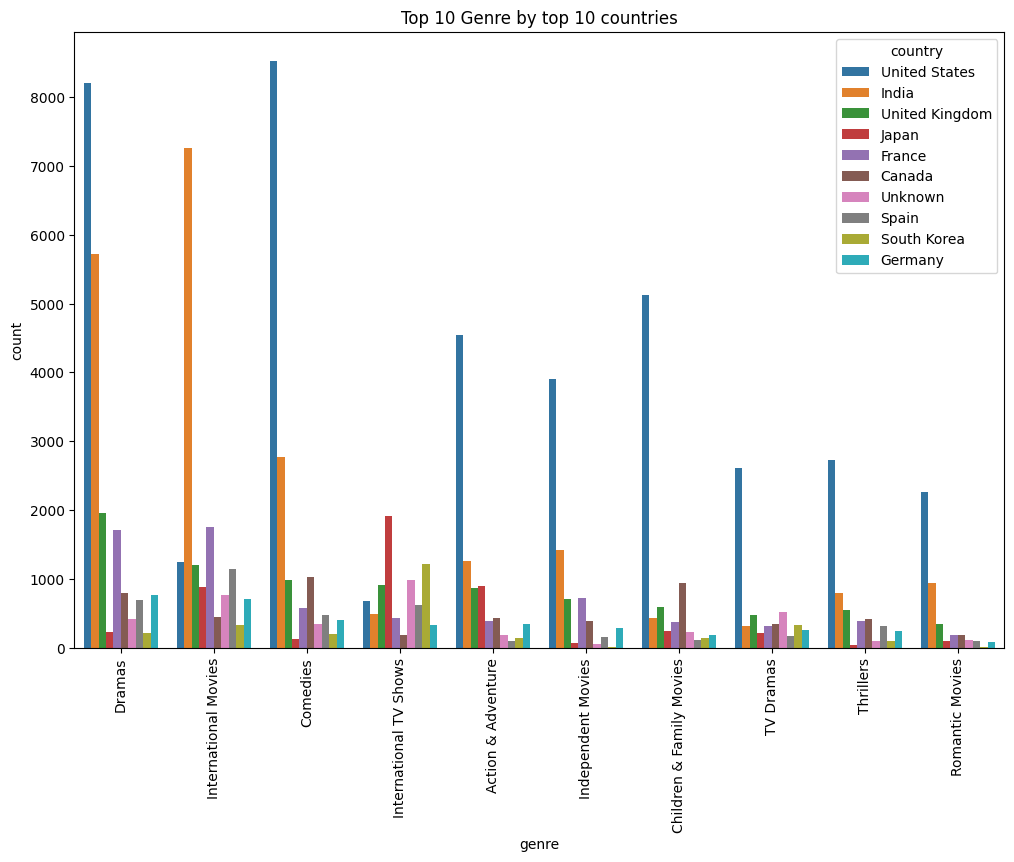

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 10 Genre by top 10 countries', fontsize=12)
sns.countplot(data=top10_gen, x='genre', order=nf['genre'].value_counts()[:10].index, hue='country', hue_order=nf['country'].value_counts()[:10].index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
nf[ (nf['country'].isin(nf['country'].value_counts()[:10].index)) & (nf['country'].isin(nf['country'].value_counts()[:10].index))]['country'].value_counts()

United States     60687
India             23911
United Kingdom    13066
Japan              9267
France             8337
Canada             8055
Unknown            5769
Spain              5462
South Korea        5220
Germany            4424
Name: country, dtype: int64

# **Runtime by country**

- As per the graph Indian movies have mor runtime (Avg  125)
- TV show runtime more in NA (US and Canada)

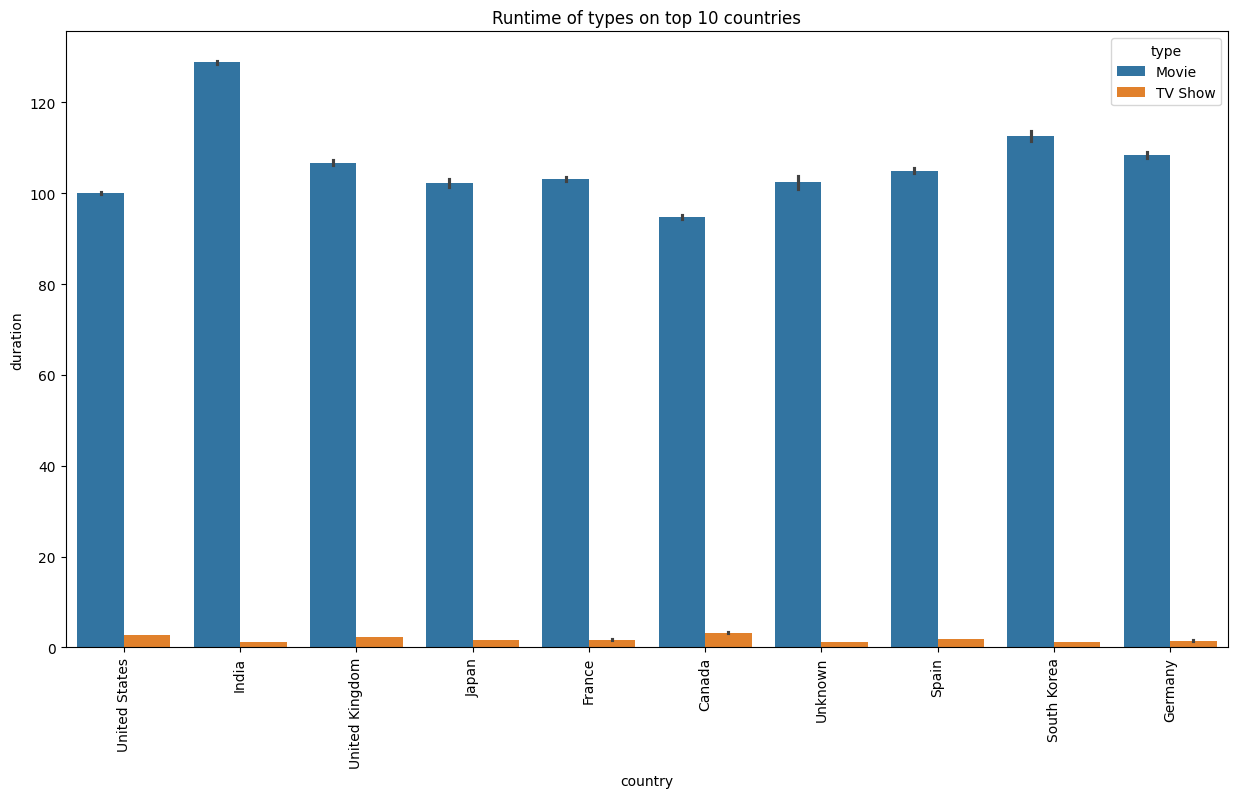

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Runtime of types on top 10 countries')
sns.barplot(x='country', y='duration', hue='type',
            data=nf[  (nf['country'].isin(nf['country'].value_counts()[:10].index))],
            order=nf[  (nf['country'].isin(nf['country'].value_counts()[:10].index))]['country'].value_counts().index
            )
plt.xticks(rotation=90)
plt.show()

In [ ]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109


In [ ]:
# take only US, India, UK, Japan and Canda data

df = nf[nf['country'].isin(['United States','India','United Kingdom','Japan','Canada'])]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109
87,s5,TV Show,Kota Factory,NaN,Mayur More,India,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
88,s5,TV Show,Kota Factory,NaN,Jitendra Kumar,India,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
89,s5,TV Show,Kota Factory,NaN,Ranjan Raj,India,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
90,s5,TV Show,Kota Factory,NaN,Alam Khan,India,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109


In [ ]:
df.describe(include=object)

,show_id,type,title,director,cast,country,rating,genre,day_added,yearmonth_added
count,114986,114986,114986,89070,114986,114986,114986,114986,114839,114839
unique,6057,2,6057,3583,22039,5,17,42,7,106
top,s7516,Movie,Movie 43,Martin Scorsese,Unknown,United States,TV-MA,Dramas,Friday,201911
freq,468,87156,468,351,1286,60687,31801,16903,30665,4163


In [ ]:
nf['country'].value_counts().index[:10]

Index(['United States', 'India', 'United Kingdom', 'Japan', 'France', 'Canada',
       'Unknown', 'Spain', 'South Korea', 'Germany'],
      dtype='object')

In [ ]:
top10_country_data = nf[nf.country.isin(nf['country'].value_counts().index[:10])]

In [ ]:
top10_country_data.isna().sum()

show_id                0
type                   0
title                  0
director           36058
cast                   0
country                0
date_added           148
release_year           0
rating                 0
duration               3
genre                  0
added_year           148
day_added            148
yearmonth_added      148
dtype: int64

# **1. Find the counts of each categorical variable both using graphical and non-graphical analysis**

In [ ]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109


## **1. type category**

a. non-graphical

In [ ]:
nf['type'].value_counts()

Movie      145756
TV Show     55996
Name: type, dtype: int64

b. graphical

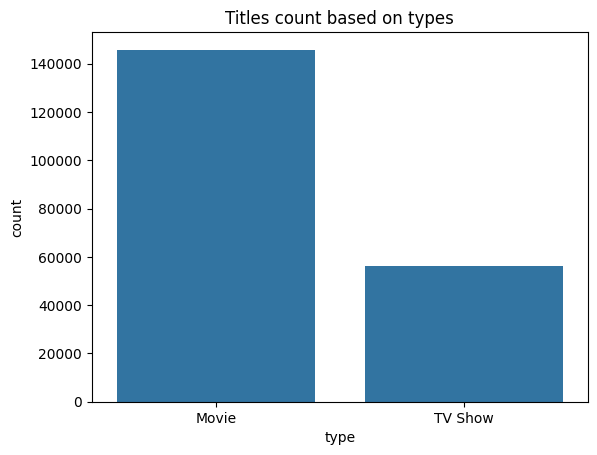

In [ ]:
plt.title('Titles count based on types')
sns.countplot(x='type', data=nf, order=nf['type'].value_counts().index)
plt.show()

## **2. title category**

a. non-graphical

In [ ]:
nf['title'].value_counts()

Kahlil Gibran's The Prophet                        700
Holidays                                           504
Movie 43                                           468
The Eddy                                           416
Narcos                                             378
                                                  ... 
Camp X                                               1
Park Na-rae: Glamour Warning                         1
Martin Matte: La vie, la mort...eh la la..!          1
Calico Critters: The Treasure of Calico Village      1
Dick Johnson Is Dead                                 1
Name: title, Length: 8711, dtype: int64

b. graphical

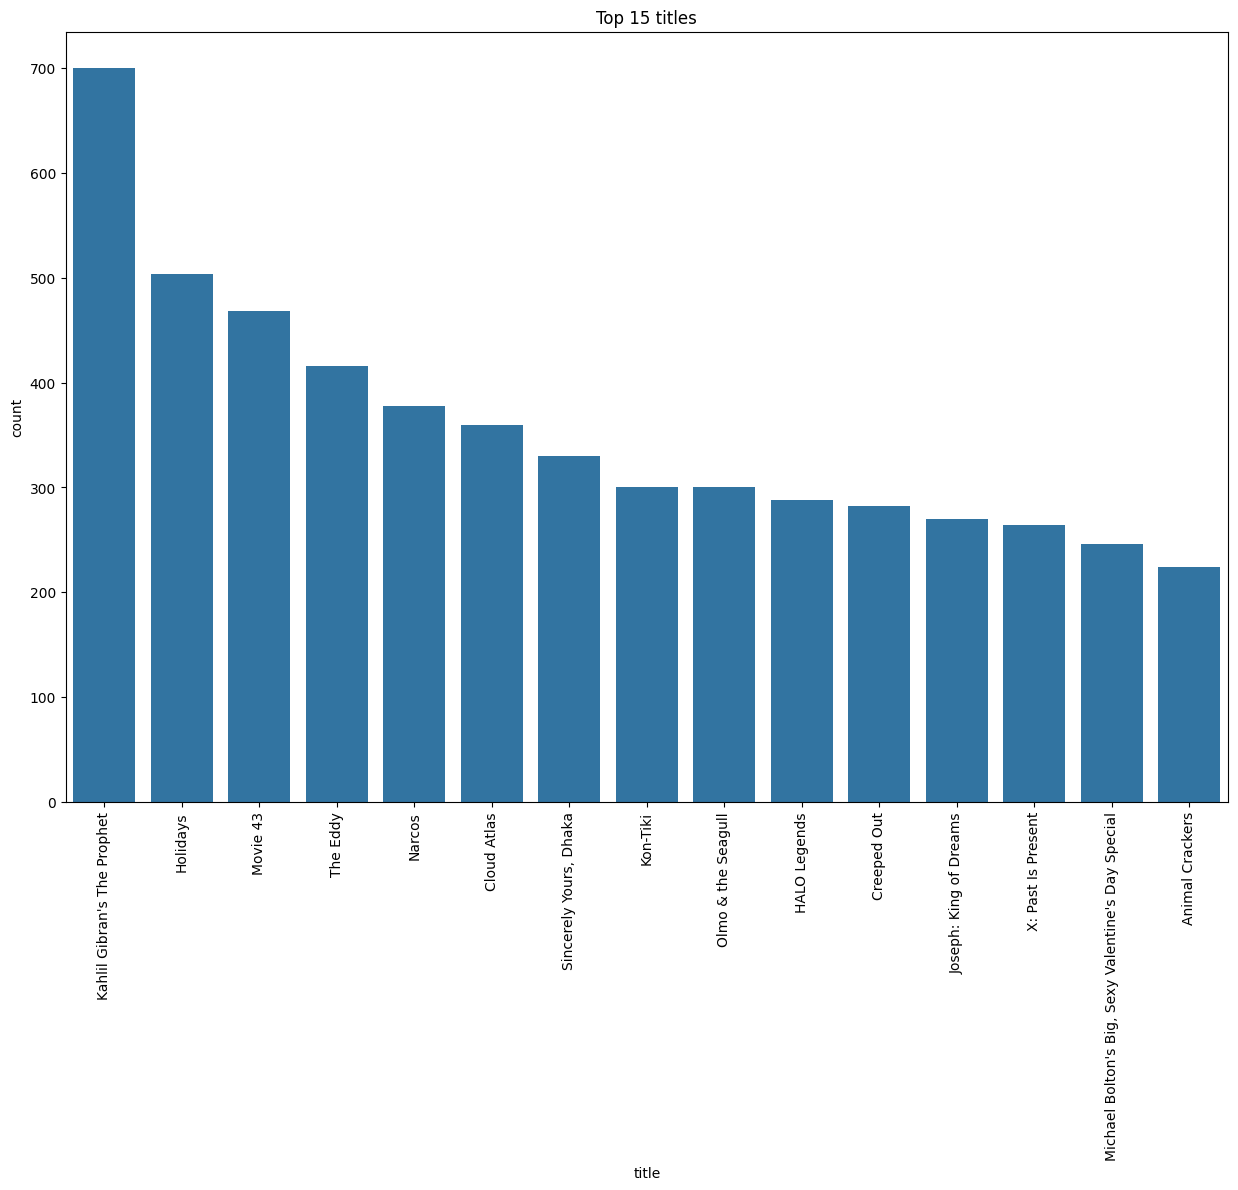

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Top 15 titles')
sns.countplot(data=nf[nf['title'].isin(nf['title'].value_counts().index[:15])], x='title', order = nf['title'].value_counts().index[:15])
plt.xticks(rotation=90)
plt.show()

## **Director category**

a. non-graphical

In [ ]:
nf['director'].value_counts()

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Richard Maurice          1
Richard E. Norman        1
Spencer Williams         1
Oscar Micheaux           1
Kirsten Johnson          1
Name: director, Length: 4993, dtype: int64

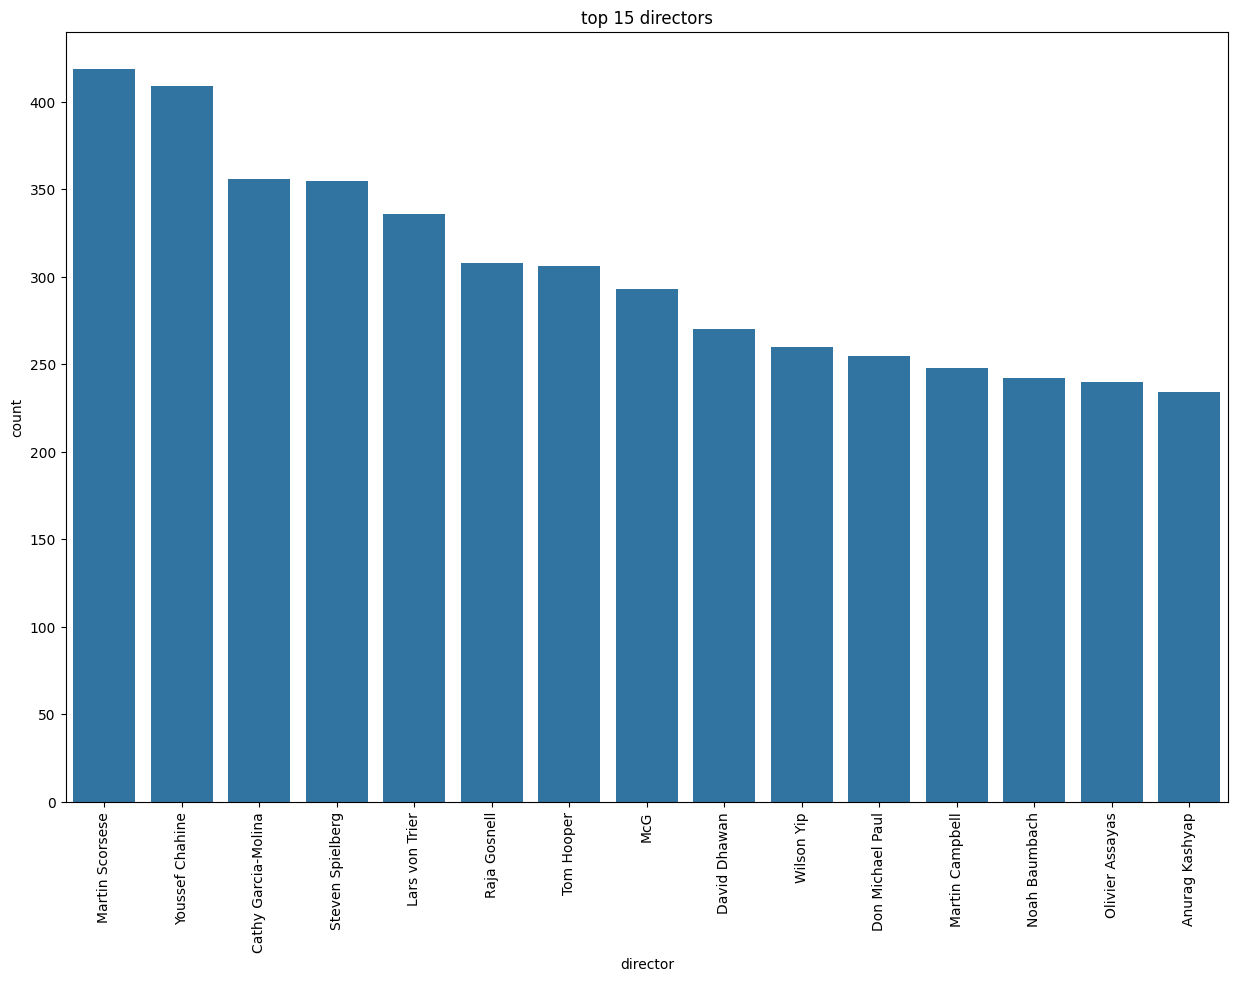

In [ ]:
plt.figure(figsize=(15,10))
plt.title('top 15 directors')
sns.countplot(data=nf[nf['director'].isin(nf['director'].value_counts().index[:15])], x='director', order = nf['director'].value_counts().index[:15])
plt.xticks(rotation=90)
plt.show()

## **Cast**

In [ ]:
nf['cast'].value_counts()

Unknown           1962
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Dario Yazbek         1
Corinne Foxx         1
Jacob Craner         1
Laila Berzins        1
Wendy McColm         1
Name: cast, Length: 36440, dtype: int64

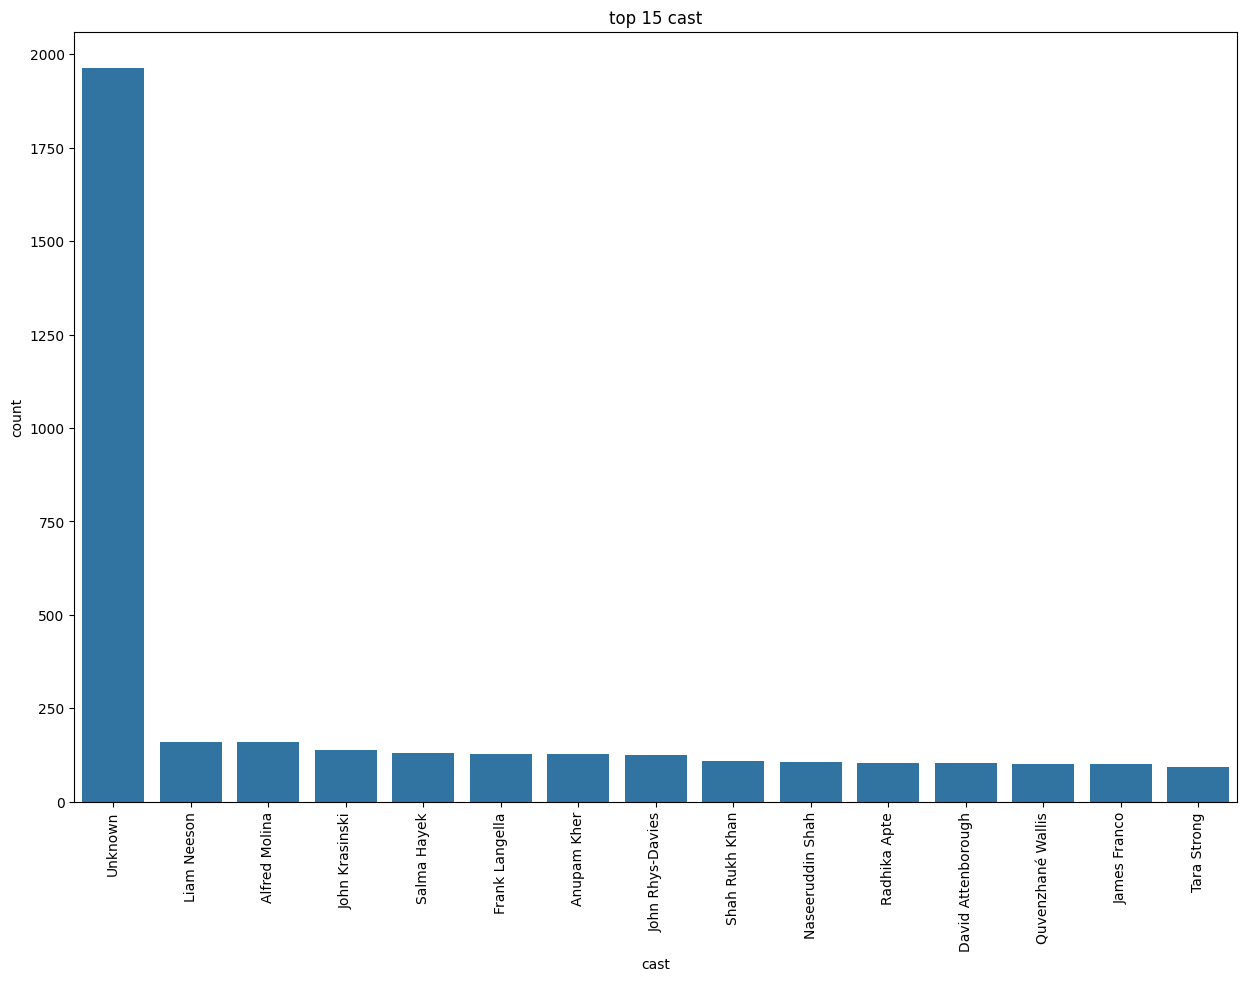

In [ ]:
plt.figure(figsize=(15,10))
plt.title('top 15 cast')
sns.countplot(data=nf[nf['cast'].isin(nf['cast'].value_counts().index[:15])], x='cast', order = nf['cast'].value_counts().index[:15])
plt.xticks(rotation=90)
plt.show()

## **Country**

United States     60687
India             23911
United Kingdom    13066
Japan              9267
France             8337
                  ...  
Samoa                 2
Nicaragua             1
United States,        1
Kazakhstan            1
Uganda                1
Name: country, Length: 128, dtype: int64


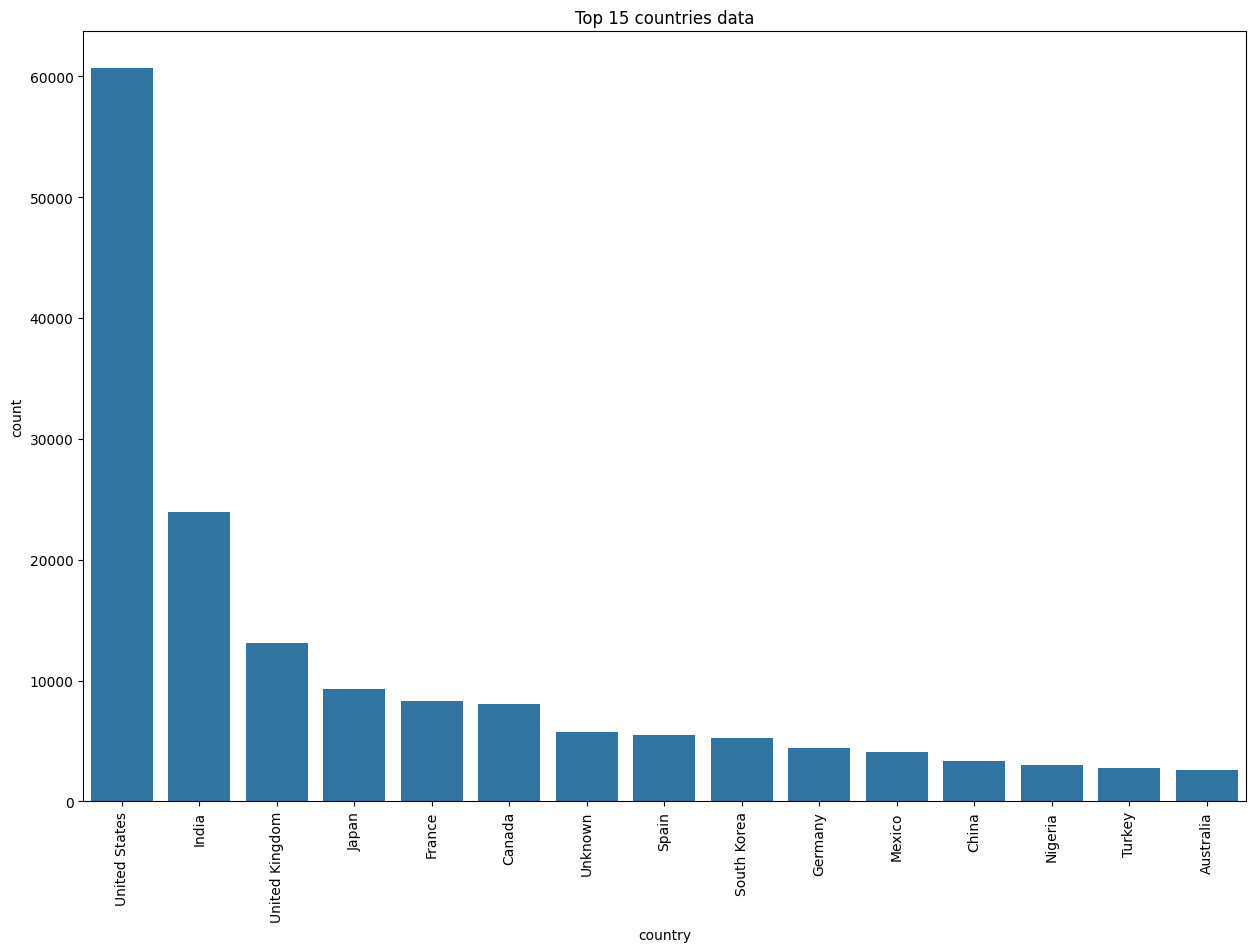

In [ ]:
print(nf['country'].value_counts())
plt.figure(figsize=(15,10))
plt.title('Top 15 countries data')
sns.countplot(data=nf[nf['country'].isin(nf['country'].value_counts().index[:15])], x='country', order = nf['country'].value_counts().index[:15])
plt.xticks(rotation=90)
plt.show()

## **Genre**

Dramas                          29752
International Movies            28186
Comedies                        20827
International TV Shows          12819
Action & Adventure              12216
Independent Movies               9818
Children & Family Movies         9764
TV Dramas                        8941
Thrillers                        7106
Romantic Movies                  6410
TV Comedies                      4953
Crime TV Shows                   4723
Horror Movies                    4571
Kids' TV                         4553
Sci-Fi & Fantasy                 4037
Music & Musicals                 3075
Romantic TV Shows                3040
Documentaries                    2401
Anime Series                     2312
TV Action & Adventure            2287
Spanish-Language TV Shows        2122
British TV Shows                 1800
Sports Movies                    1529
Classic Movies                   1434
TV Mysteries                     1280
Korean TV Shows                  1121
Cult Movies 

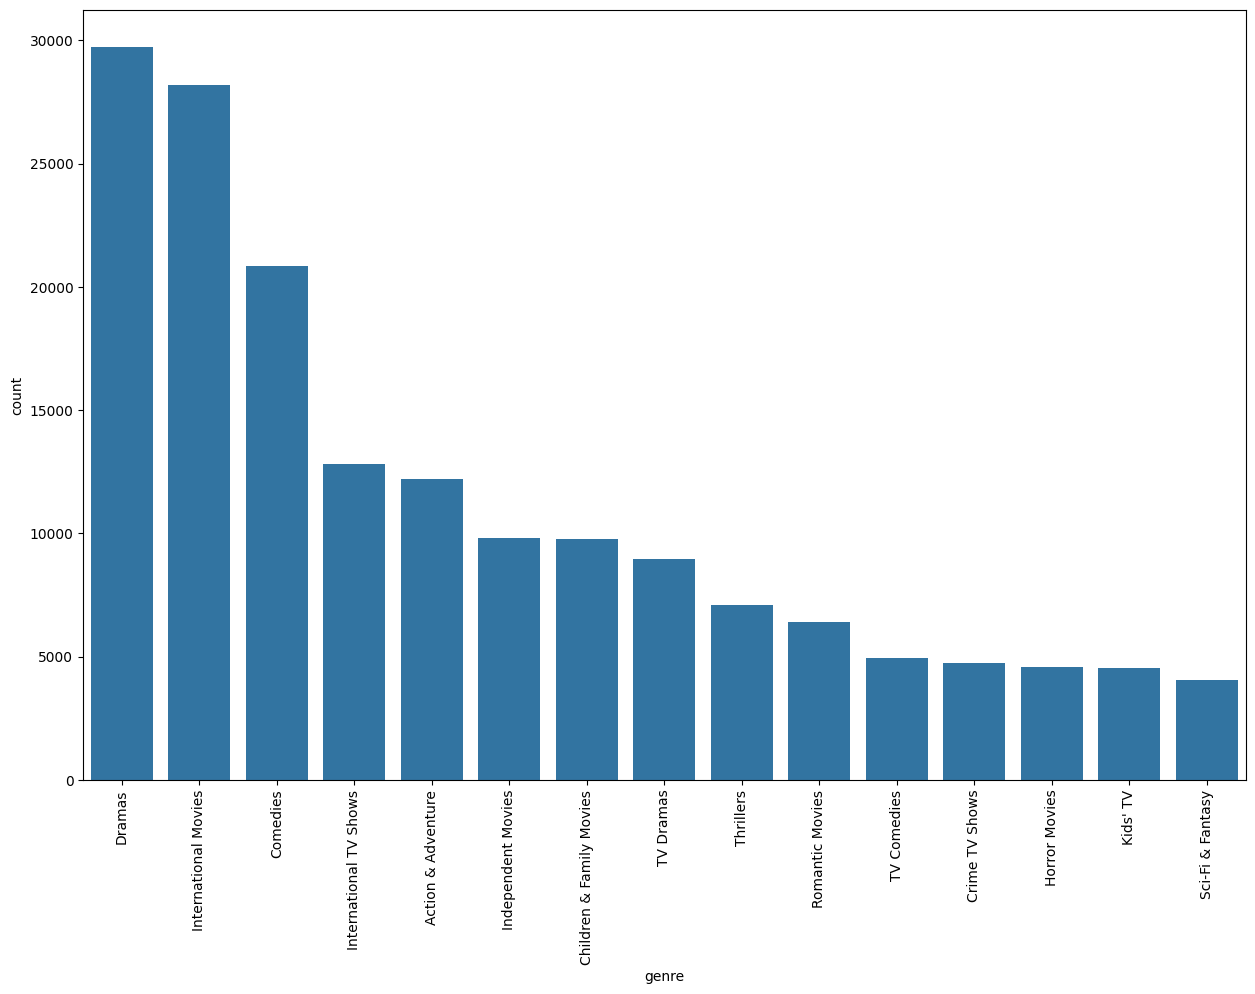

In [ ]:
print(nf['genre'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(data=nf[nf['genre'].isin(nf['genre'].value_counts().index[:15])], x='genre', order = nf['genre'].value_counts().index[:15])
plt.xticks(rotation=90)
plt.show()

# **Comparison of tv shows vs. movies**

## **number of movies produced in each country and pick the top 10 countries**

In [ ]:
top10_country_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109
58,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,France,2021-09-24,2021,TV-MA,1.0,Crime TV Shows,2021.0,Friday,202109
59,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,Unknown,2021-09-24,2021,TV-MA,1.0,Crime TV Shows,2021.0,Friday,202109
61,s3,TV Show,Ganglands,Julien Leclercq,Nabiha Akkari,Unknown,2021-09-24,2021,TV-MA,1.0,Crime TV Shows,2021.0,Friday,202109
64,s3,TV Show,Ganglands,Julien Leclercq,Noureddine Farihi,Unknown,2021-09-24,2021,TV-MA,1.0,Crime TV Shows,2021.0,Friday,202109


In [ ]:
nf[nf['type'] == 'Movie'].groupby('country')['title'].nunique().sort_values(ascending=False)[:10]

country
United States     2902
India             1047
United Kingdom     565
Canada             342
France             317
Unknown            271
Germany            188
Spain              180
Japan              137
Nigeria            129
Name: title, dtype: int64

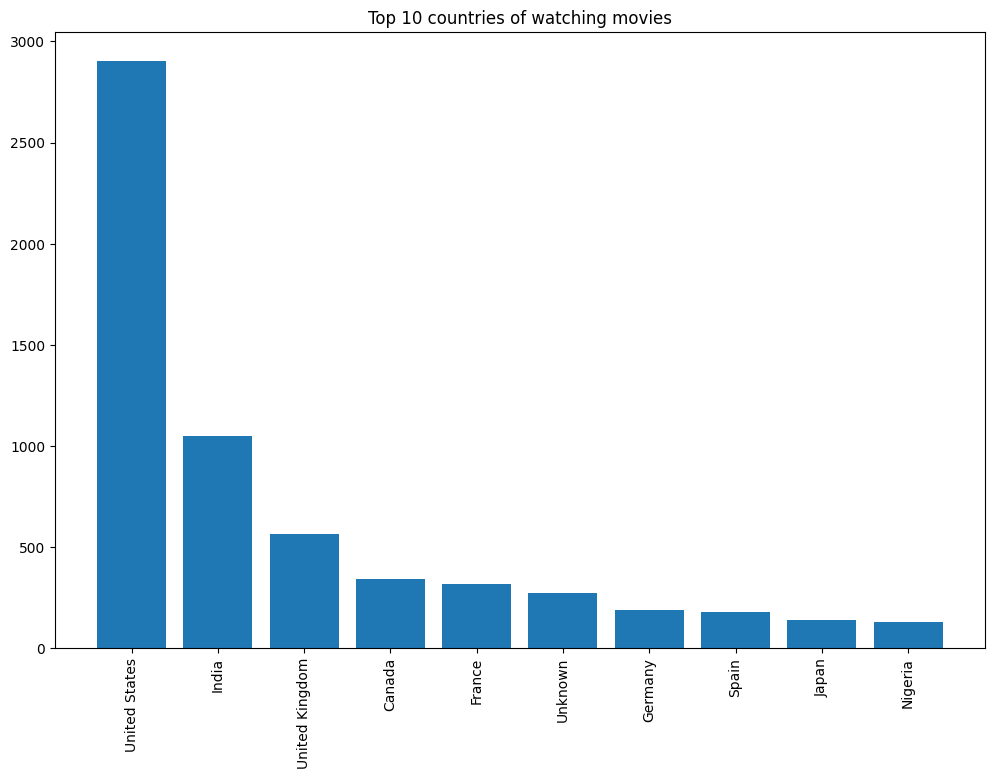

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 10 countries of watching movies')
plt.bar(nf[nf['type'] == 'Movie'].groupby('country')['title'].nunique().sort_values(ascending=False)[:10].index,
        nf[nf['type'] == 'Movie'].groupby('country')['title'].nunique().sort_values(ascending=False)[:10].values)

plt.xticks(rotation=90)
plt.show()

## **TVSHOW**

In [ ]:
nf[nf['type'] == 'TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False)[:10]

country
United States     1008
United Kingdom     279
Unknown            262
Japan              227
South Korea        196
Canada             144
India              100
France              95
Taiwan              86
Spain               70
Name: title, dtype: int64

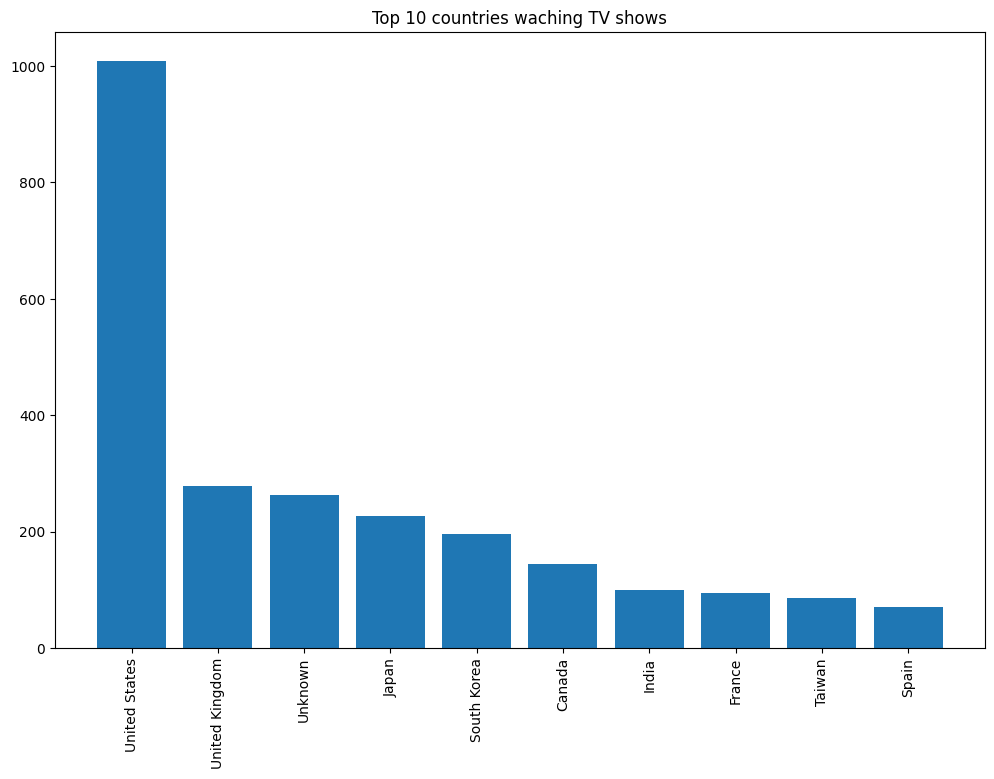

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 10 countries waching TV shows')
plt.bar(nf[nf['type'] == 'TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False)[:10].index,
        nf[nf['type'] == 'TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False)[:10].values)

plt.xticks(rotation=90)
plt.show()

# **3. What is the best time to launch a TV show**

Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

In [ ]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109


In [ ]:
nf[nf['type']=='Movie'].groupby('day_added')['title'].nunique().sort_values(ascending=False)

day_added
Friday       1555
Thursday     1050
Wednesday     905
Tuesday       850
Monday        628
Sunday        569
Saturday      557
Name: title, dtype: int64

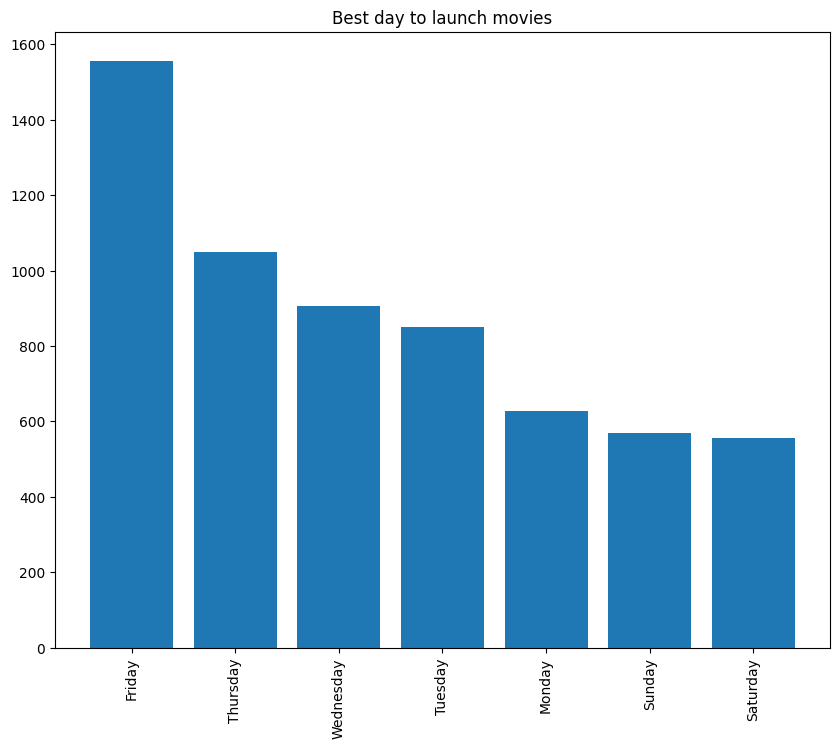

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Best day to launch movies')
plt.bar(nf[nf['type'] == 'Movie'].groupby('day_added')['title'].nunique().sort_values(ascending=False).index,
        nf[nf['type'] == 'Movie'].groupby('day_added')['title'].nunique().sort_values(ascending=False).values)

plt.xticks(rotation=90)
plt.show()

In [ ]:
nf[nf['type']=='TV Show'].groupby('day_added')['title'].nunique().sort_values(ascending=False)

day_added
Friday       904
Wednesday    360
Thursday     338
Tuesday      337
Saturday     250
Monday       219
Sunday       179
Name: title, dtype: int64

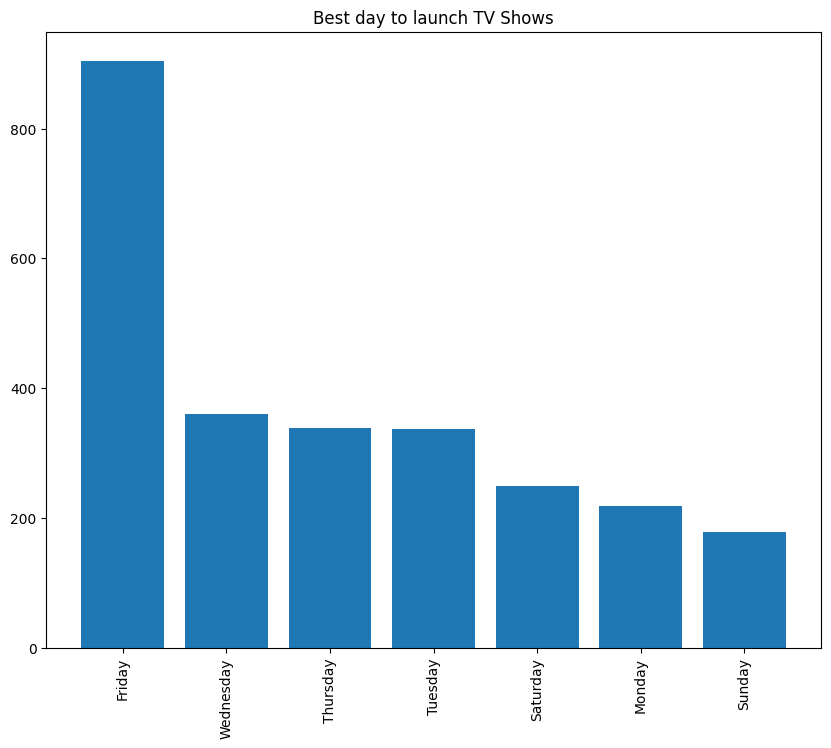

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Best day to launch TV Shows')
plt.bar(nf[nf['type'] == 'TV Show'].groupby('day_added')['title'].nunique().sort_values(ascending=False).index,
        nf[nf['type'] == 'TV Show'].groupby('day_added')['title'].nunique().sort_values(ascending=False).values)

plt.xticks(rotation=90)
plt.show()

## **Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies**


In [ ]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109


In [ ]:
nf['month_added'] = nf['date_added'].dt.month_name()

In [ ]:
nf[nf['type']=='Movie'].groupby('month_added')['title'].nunique().sort_values(ascending=False)

month_added
July         563
April        549
December     547
January      546
October      540
March        528
August       519
September    518
November     498
June         488
May          436
February     382
Name: title, dtype: int64

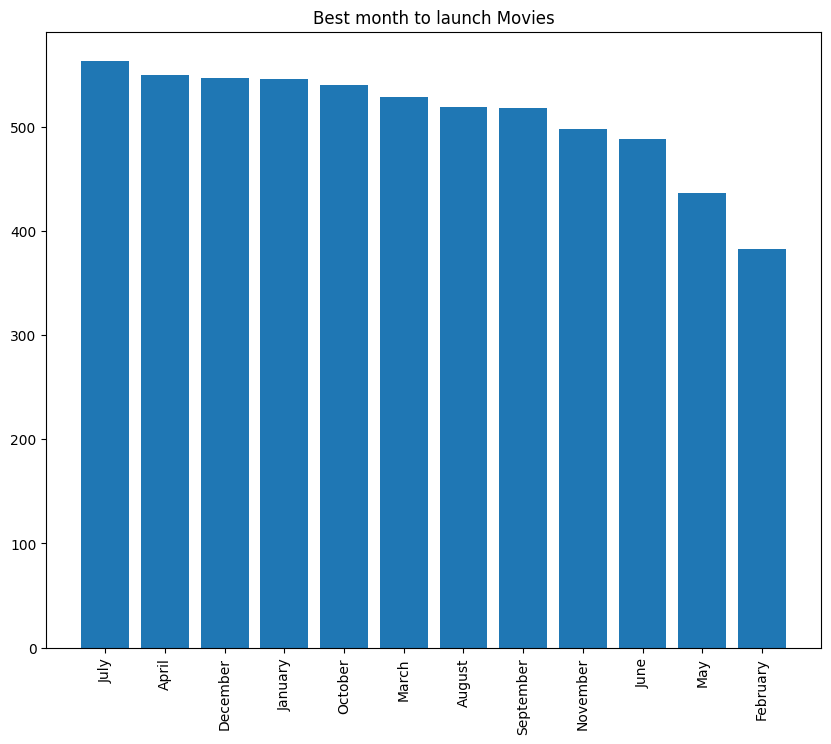

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Best month to launch Movies')
plt.bar(nf[nf['type']=='Movie'].groupby('month_added')['title'].nunique().sort_values(ascending=False).index,
        nf[nf['type']=='Movie'].groupby('month_added')['title'].nunique().sort_values(ascending=False).values)

plt.xticks(rotation=90)
plt.show()

In [ ]:
nf[nf['type']=='TV Show'].groupby('month_added')['title'].nunique().sort_values(ascending=False)

month_added
December     263
July         250
September    237
June         230
August       227
October      210
March        208
April        206
November     205
January      189
May          184
February     178
Name: title, dtype: int64

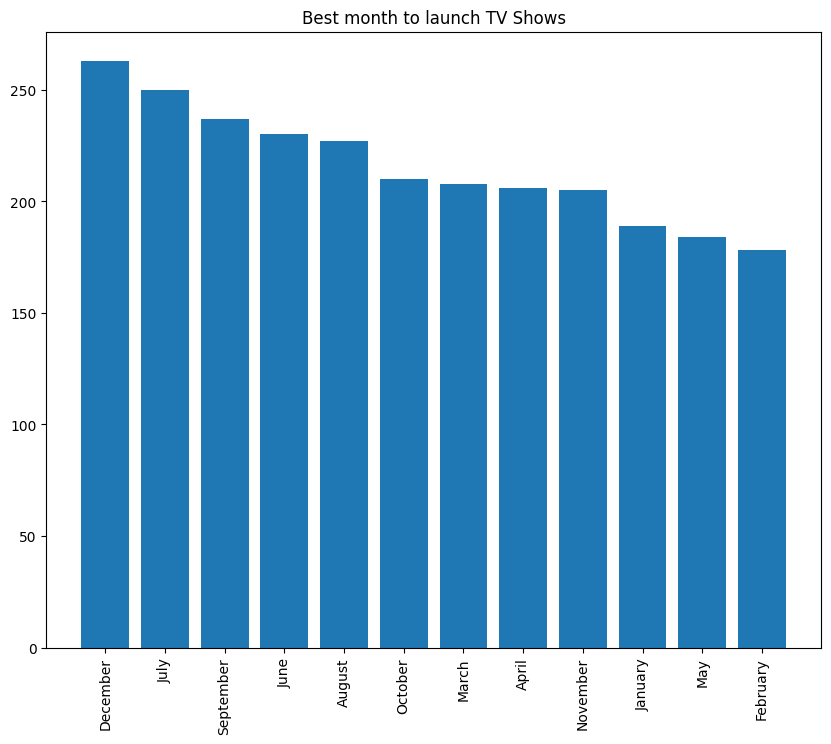

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Best month to launch TV Shows')
plt.bar(nf[nf['type']=='TV Show'].groupby('month_added')['title'].nunique().sort_values(ascending=False).index,
        nf[nf['type']=='TV Show'].groupby('month_added')['title'].nunique().sort_values(ascending=False).values)

plt.xticks(rotation=90)
plt.show()

# **Analysis of actors/directors of different types of shows/movies**

## **Identify the top 10 directors who have appeared in most movies or TV shows**

In [ ]:
nf[nf['type'] == 'Movie'].groupby('director')['title'].nunique().sort_values(ascending=False)[:10]

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
Name: title, dtype: int64

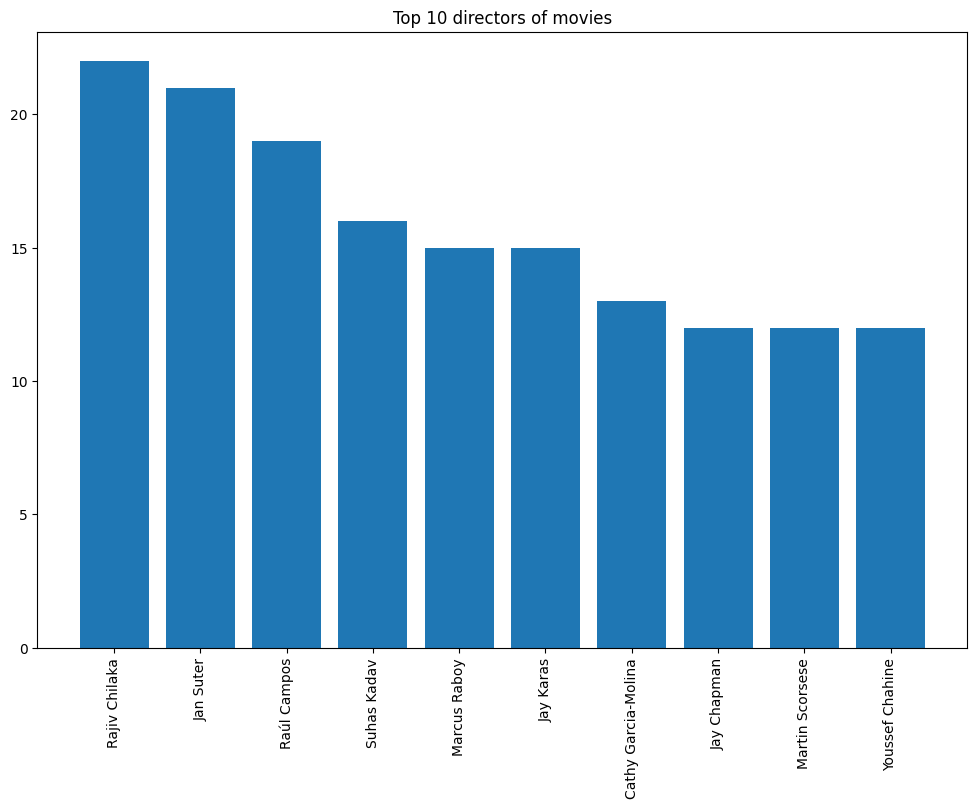

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 10 directors of movies')
plt.bar(nf[nf['type'] == 'Movie'].groupby('director')['title'].nunique().sort_values(ascending=False)[:10].index,
        nf[nf['type'] == 'Movie'].groupby('director')['title'].nunique().sort_values(ascending=False)[:10].values)

plt.xticks(rotation=90)
plt.show()

In [ ]:
nf[nf['type'] == 'TV Show'].groupby('director')['title'].nunique().sort_values(ascending=False)[:10]

director
Ken Burns                3
Alastair Fothergill      3
Stan Lathan              2
Jung-ah Im               2
Joe Berlinger            2
Hsu Fu-chun              2
Gautham Vasudev Menon    2
Lynn Novick              2
Iginio Straffi           2
Shin Won-ho              2
Name: title, dtype: int64

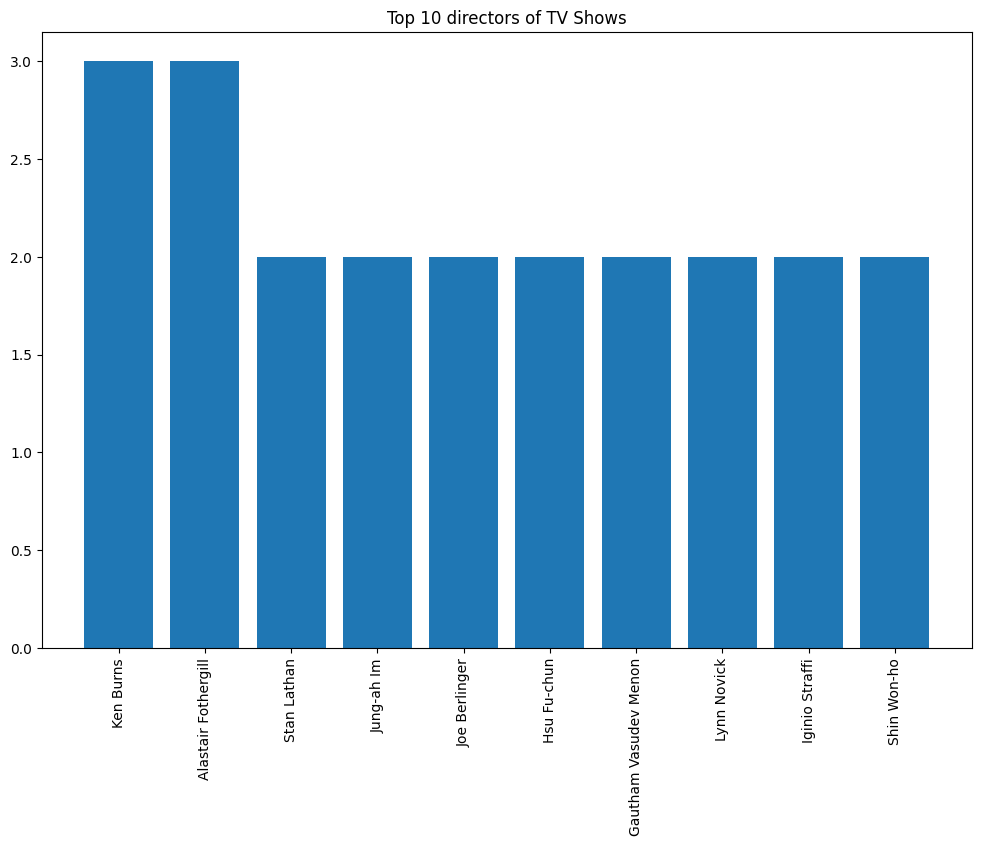

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 10 directors of TV Shows')
plt.bar(nf[nf['type'] == 'TV Show'].groupby('director')['title'].nunique().sort_values(ascending=False)[:10].index,
        nf[nf['type'] == 'TV Show'].groupby('director')['title'].nunique().sort_values(ascending=False)[:10].values)

plt.xticks(rotation=90)
plt.show()

In [ ]:
nf[nf['type'] == 'Movie'].groupby('cast')['title'].nunique().sort_values(ascending=False)[:10]

cast
Unknown             458
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     32
Om Puri              30
Akshay Kumar         30
Paresh Rawal         28
Julie Tejwani        28
Amitabh Bachchan     28
Rupa Bhimani         27
Name: title, dtype: int64

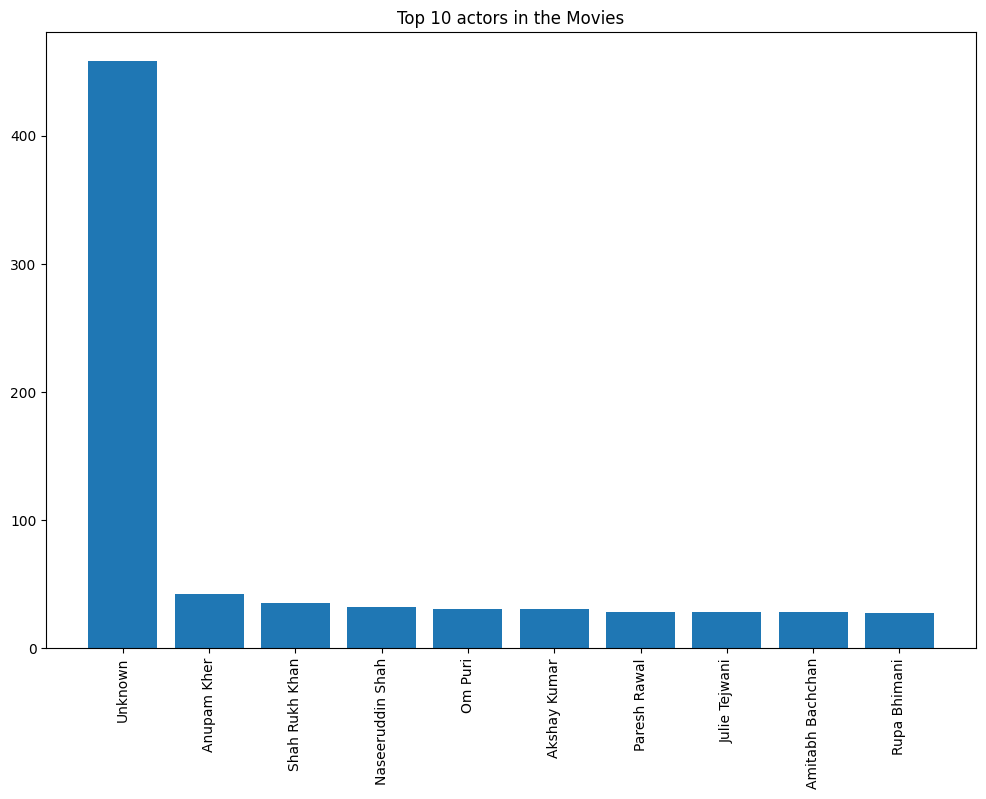

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 10 actors in the Movies')
plt.bar(nf[nf['type'] == 'Movie'].groupby('cast')['title'].nunique().sort_values(ascending=False)[:10].index,
        nf[nf['type'] == 'Movie'].groupby('cast')['title'].nunique().sort_values(ascending=False)[:10].values)

plt.xticks(rotation=90)
plt.show()

In [ ]:
nf[nf['type'] == 'TV Show'].groupby('cast')['title'].nunique().sort_values(ascending=False)[:10]

cast
Unknown               271
Takahiro Sakurai       25
Yuki Kaji              19
Junichi Suwabe         17
Daisuke Ono            17
Ai Kayano              17
Yuichi Nakamura        16
Jun Fukuyama           15
Yoshimasa Hosoya       15
David Attenborough     14
Name: title, dtype: int64

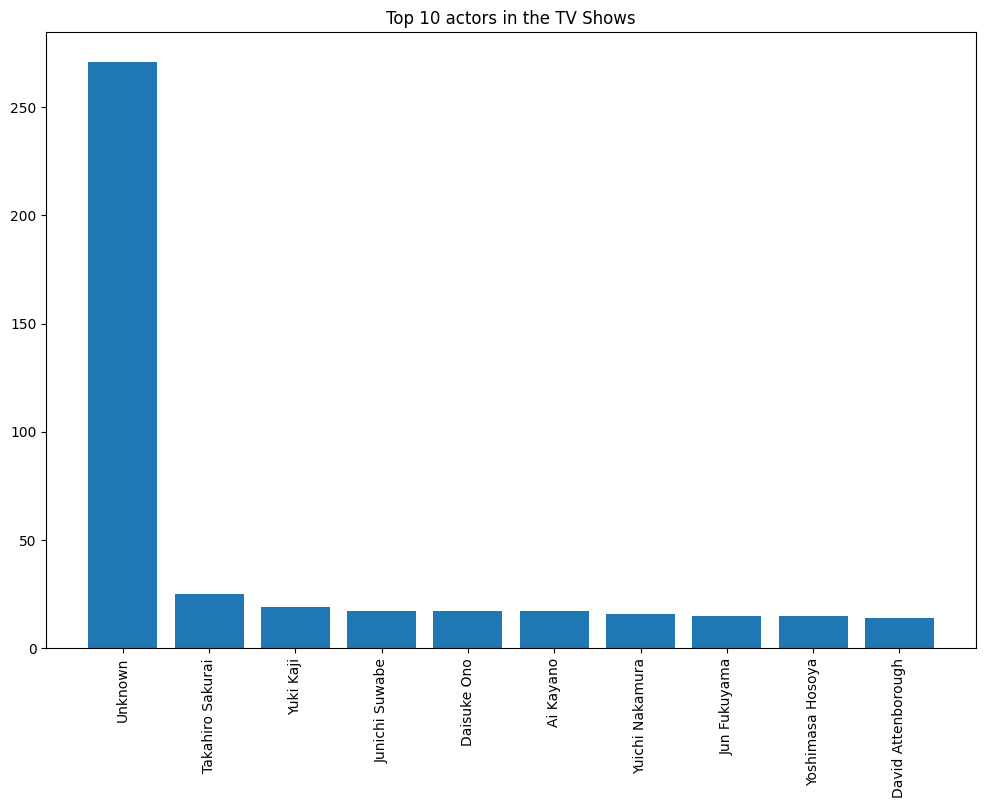

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 10 actors in the TV Shows')
plt.bar(nf[nf['type'] == 'TV Show'].groupby('cast')['title'].nunique().sort_values(ascending=False)[:10].index,
        nf[nf['type'] == 'TV Show'].groupby('cast')['title'].nunique().sort_values(ascending=False)[:10].values)

plt.xticks(rotation=90)
plt.show()

# **Which genre movies are more popular or produced more**

In [ ]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109,September
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September


# **Top 10 titles count based on type**

In [ ]:
nf['country'].value_counts()[:10]

United States     60687
India             23911
United Kingdom    13066
Japan              9267
France             8337
Canada             8055
Unknown            5769
Spain              5462
South Korea        5220
Germany            4424
Name: country, dtype: int64

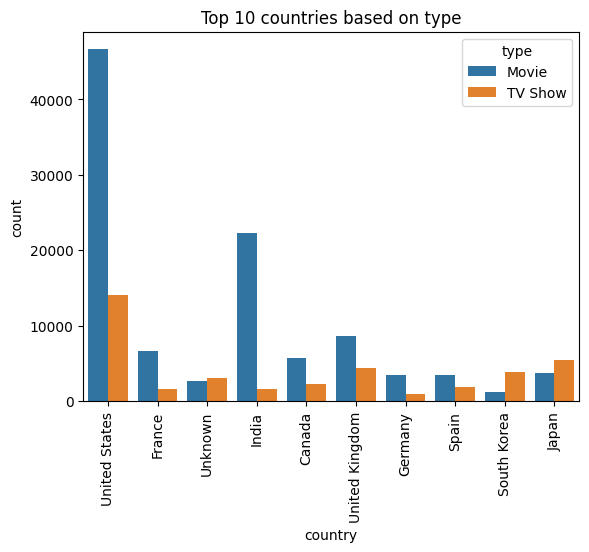

In [ ]:
plt.title('Top 10 countries based on type')
sns.countplot(data=top10_country_data, x='country', hue='type')
plt.xticks(rotation=90)
plt.show()

# **Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

In [ ]:
nf['diff_release'] = nf['added_year'] - nf['release_year']

In [ ]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added,month_added,diff_release
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109,September,1.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September,0.0
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September,0.0
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September,0.0
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September,0.0


In [ ]:
# remove null data of 'diff_release' from the DF
data = nf.dropna(subset=['diff_release'])

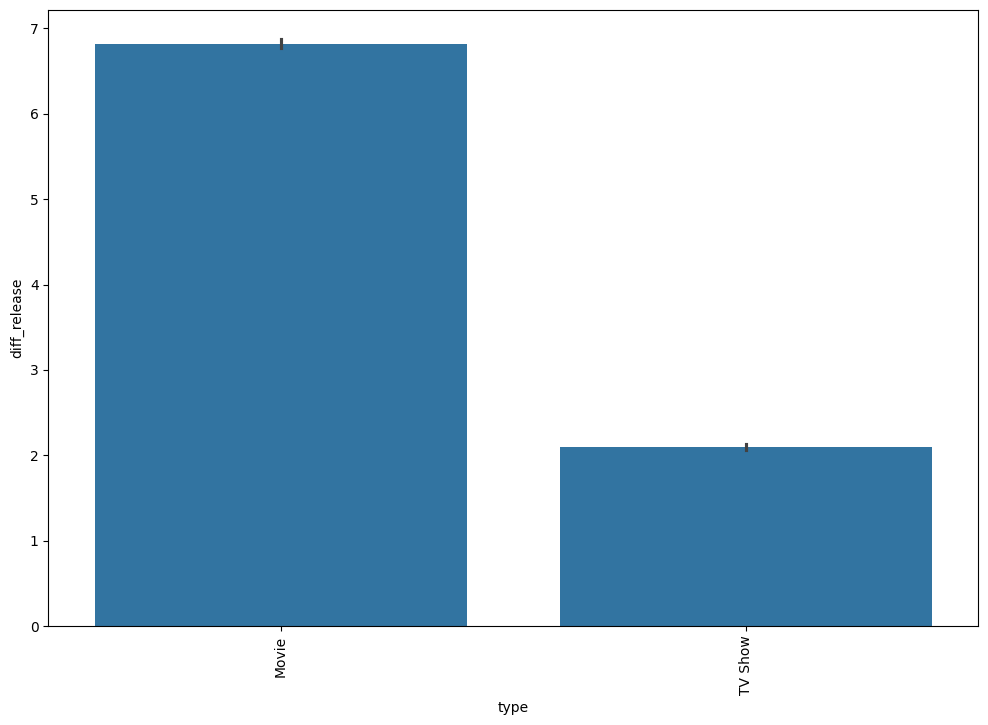

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=data, x='type', y='diff_release')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#sns.kdeplot(data=nf, x='release_year', y='added_year')

In [ ]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,day_added,yearmonth_added,month_added,diff_release
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021.0,Saturday,202109,September,1.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September,0.0
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September,0.0
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September,0.0
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2.0,International TV Shows,2021.0,Friday,202109,September,0.0


# **Release_year vs added_year**

- Most of the movies were added after 2016 even they were released long back

- 2013 onwards new movies and tv shows adding continuoulsy

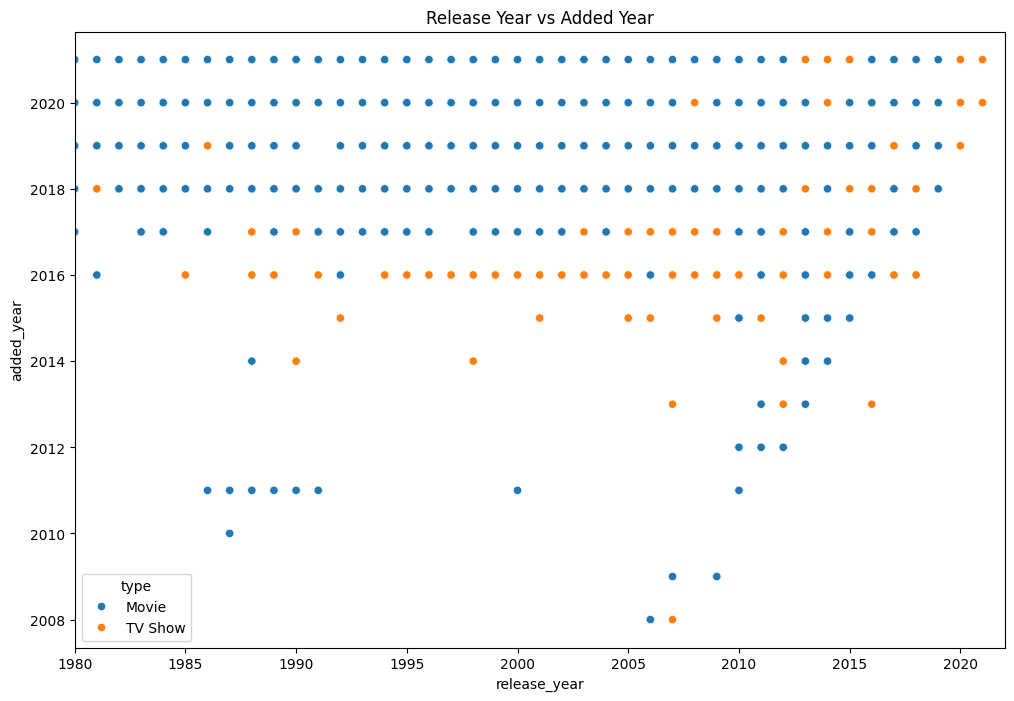

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Release Year vs Added Year')
sns.scatterplot(data=nf, x='release_year', y='added_year', hue='type')
plt.xlim(left=1980, right=2022)

plt.show()

In [ ]:
nf['genre'].value_counts().index[:5]

Index(['Dramas', 'International Movies', 'Comedies', 'International TV Shows',
       'Action & Adventure'],
      dtype='object')

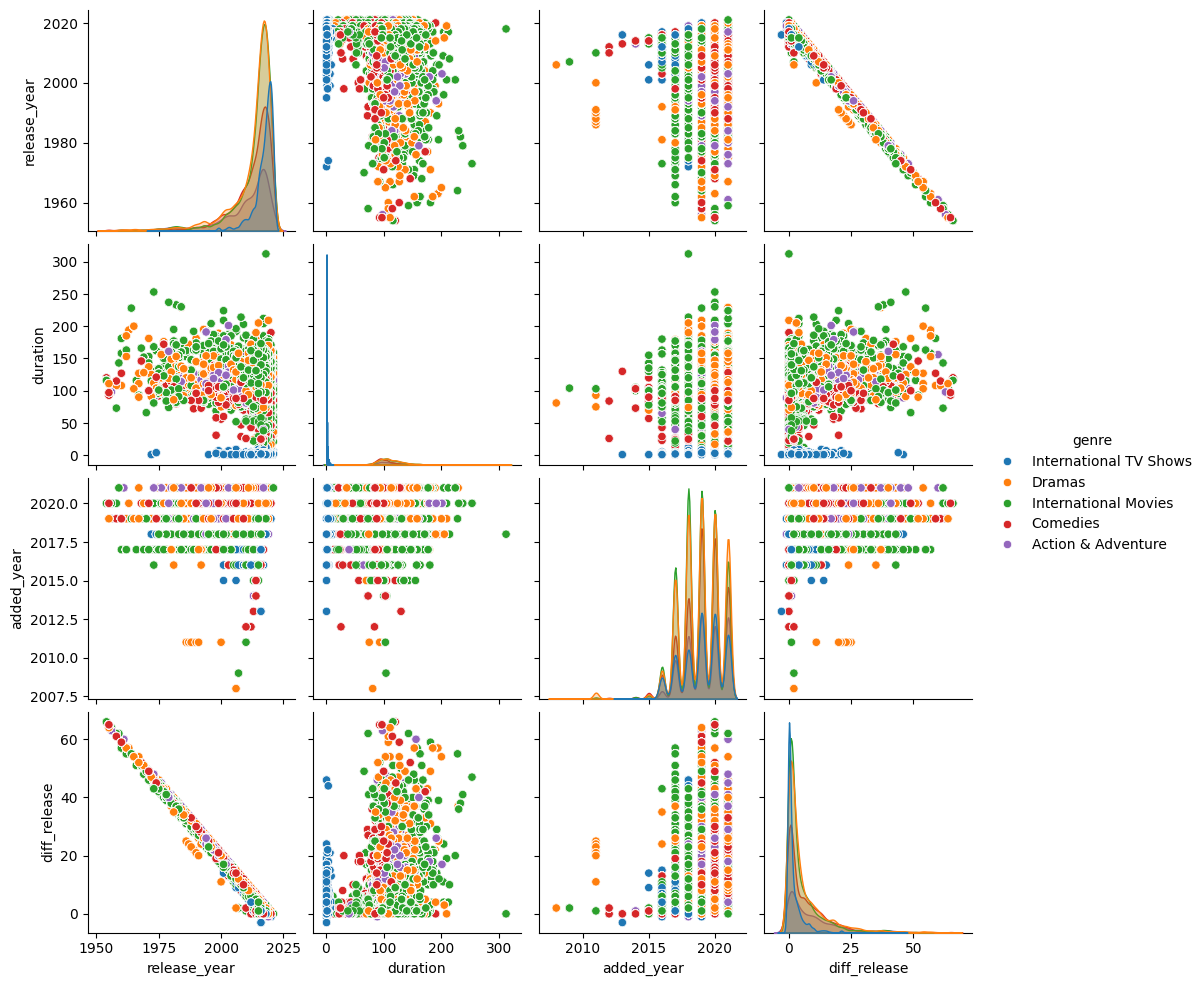

In [ ]:
sns.pairplot(data=nf[nf['genre'].isin(nf['genre'].value_counts().index[:5])], hue='genre')

In [ ]:
# correlation
nf[nf['genre'].isin(nf['genre'].value_counts().index[:5])].corr()

<ipython-input-176-5ca3569bda50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nf[nf['genre'].isin(nf['genre'].value_counts().index[:5])].corr()


,release_year,duration,added_year,diff_release
release_year,1.000000,-0.276026,0.024339,-0.986362
duration,-0.276026,1.000000,0.003709,0.274048
added_year,0.024339,0.003709,1.000000,0.140536
diff_release,-0.986362,0.274048,0.140536,1.000000


-- Looks like Netflix adding new releases since 2016 onwards.
If keep on adding new types(Movies/TV Shows) without much delay, so can get more new customers

<ipython-input-177-cecef1c53e10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nf[nf['genre'].isin(nf['genre'].value_counts().index[:5])].corr(), annot=True)


<Axes: >

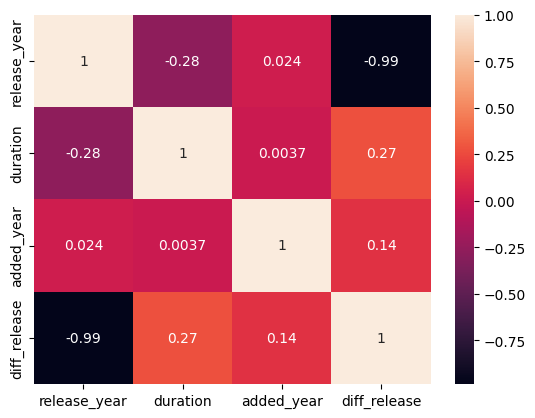

In [ ]:
sns.heatmap(nf[nf['genre'].isin(nf['genre'].value_counts().index[:5])].corr(), annot=True)

Netflix insigts:

1. Indian customers watching international movies more, so If they keep on adding new releases of International movies and Indian movies. Netflix can get more customers in India

2. USA - US people more likely to watch less duration movies and lengthy TVShows.
